
# "Gradio + HuggingFace Spaces: A Tutorial"
> "Learn about easy ML app development"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [deep learning]
- hide: true
- permalink: /gradio_hf_spaces_tutorial

# Introduction

After you train a machine learning model, the next thing to do is showcase it to the world by making a demo. Currently, the easiest way to do so if with Gradio, hosting on HuggingFace Spaces. With the Gradio framework deployed on Spaces, it takes <10 minutes to deploy a model! Let's see how we can easily deploy a model for the world to try out with these platforms. We will use a classic CNN pet classifier as an example.

# Preliminaries: Training a pet classifier
Before we make a demo, we need to have a model to actually demo! Let's quickly train a simple ResNet50 pet classifier on the Oxford Pets dataset using fastai.

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = cnn_learner(dls, models.resnet50, metrics=accuracy)
learn.fine_tune(1)
learn.path = Path('.')
learn.export()

/opt/conda/envs/spell/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.952666,0.269118,0.903924,02:20


epoch,train_loss,valid_loss,accuracy,time
0,0.427775,0.232428,0.928958,02:51


And with fastai, it's that simple! If you are interested, check out more about fastai, a simple and flexible PyTorch training framework, over [here](https://docs.fast.ai).

# Using Gradio

Let's see how to make a demo web app with Gradio. First let's load our model:


In [2]:
learn = load_learner('export.pkl')

Next, let's define a prediction function our model:

In [3]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

Finally, let's import Gradio and use it's functionality to make an interface and launch it. Note that if you are doing this from a notebook, the Gradio demo will also show up within the notebook for you to try.

In [4]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://58742.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://58742.gradio.app')

That's it! The actual creation of the demo takes one line! {% fn 1 %}

{{ 'One of the developers of Gradio created a simple Python module to easily create Gradio demos for fastai `Learner` objects. Check it out [here](https://github.com/aliabd/fastgradio). It currently only supports image-to-label interfaces but it could likely be expanded to other tasks fairly easily.'  | fndetail: 1 }}

All Gradio interfaces are created by constructing a `gradio.Interface()` object. As you can see in this example, the `Interface` object takes in the function that we want to make an interface for (usually an ML model inference function), Gradio input components (the number of input components should match the number of parameters of the provided function), and Gradio output components (the number of output components should match the number of values returned by the provided function). Gradio provides components for various types of input and output types. This includes: images (upload, draw, or webcam), video, audio (upload or microphone), textboxes, dataframes, timeseries, generic files, and more! So you should be able to create a Gradio demo for virtually any type of ML task you can think of!

After the `gradio.Interface()` object is defined, the interface is launched with the `launch` method. 

# Optional: customizing our Gradio app

Gradio has lots of features that we can use to customize our app. Let's go over a few of these features and add them to our demo. All of these features are arguments for the instantiation of the `Interface` class.

First of all, we can pass in a title and description for our app which goes at the top before our input and output components:

In [5]:
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."

We can also put a link at the bottom of our demo. Here I will link to this blog post:

In [6]:
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"

We can also provide some example inputs that people can try out. Here I have provided an example Siamese cat image, which is in the same directory as my code:

In [7]:
examples = ['siamese.jpg']

Another interesting feature that Gradio has is the ability for interpretation so that users can understand what parts of the input are responsible for the output. We'll use the default interpretation function provided by Gradio but you can use your own as well:

In [8]:
interpretation='default'

Note that the default interpretation function needs `scikit-image` to be installed. More information on the interpretation feature is provided [here](https://gradio.app/advanced_features/). 

Gradio also provides a screenshotting feature that can make it really easy to share your examples and results with others. It is enabled by default.

Finally, Gradio also supports serving of inference requests with a queue. This can be helpful when your app receives a significant amount of traffic. We'll enable a queue here:

In [9]:
enable_queue=True

You can also add custom CSS for your Gradio app but we'll not do that here (my CSS skills are essentially non-existent! 😂).

Let's put it all together and make our interface with these additional features:

In [10]:
gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,article=article,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch(share=True)

Running on local URL:  http://127.0.0.1:7861/
Running on public URL: https://47258.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://47258.gradio.app')

Check the Gradio [documentation](https://gradio.app/docs) for more information on how to customize your interface.

Let's put it all into one file which we name `app.py`:
```python
import gradio as gr
from fastai.vision.all import *
import skimage

learn = load_learner('export.pkl')

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"
examples = ['siamese.jpg']
interpretation='default'
enable_queue=True

gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,article=article,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch()
```

Let's also make a `requirements.txt` file which will allow us to install the packages that we need in whatever environment we need:
```
fastai
scikit-image
```

Now that we have our self-contained web app, we could deploy this on any  webserver or cloud platform that we want. But let's see how we can use HuggingFace Spaces to deploy it.



# Using HuggingFace Spaces

[HuggingFace Spaces](https://huggingface.co/spaces) is a free-to-use platform for hosting machine learning demos and apps. The Spaces environment provided is a CPU environment with 16 GB RAM and 8 cores. It currently supports the Gradio and Streamlit platforms. Here we will make a Space for our Gradio demo.

In order to be able to create a HuggingFace Space, you need to have a HuggingFace account. You can sign up for free [here](https://huggingface.co/join). After signing up, you can create a Space by clicking "New Space" on the navigation menu (press on your profile image).

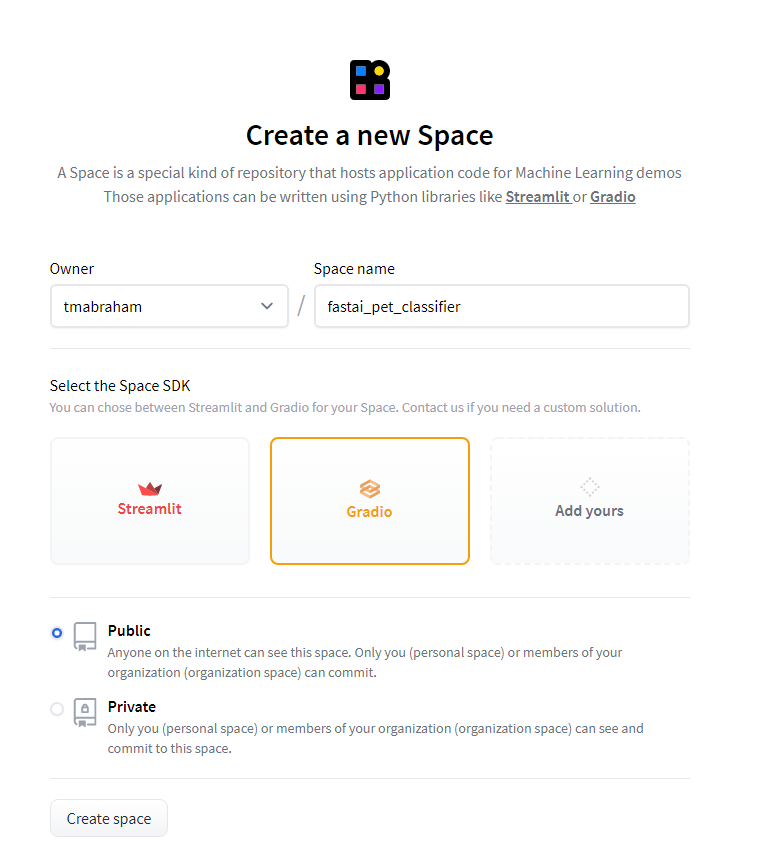

Now you will be shown instructions on how to add your code to this Space from the command line to prepare the demo. Spaces are essentially git repositories (like GitHub) with an `app.py` file from which the demo is prepared. 

So we can clone the repository to a local directory, 
```
git clone https://huggingface.co/spaces/tmabraham/fastai_pet_classifier
```
add the `app.py`, `requirements.txt`, `export.pkl`, and `siamese.jpg` files,
```
cp app.py fastai_pet_classifier/app.py
cp requirements.txt fastai_pet_classifier/requirements.txt
cp export.pkl fastai_pet_classifier/export.pkl
cp siamese.jpg fastai_pet_classifier/siamese.jpg
```

Now before we commit our files, there is something we need to pay attention to. Our model file `export.pkl` is too big to be handled by `git`. So instead we need to use git-lfs. You will need to install [git-lfs](https://git-lfs.github.com) and then initialize git-lfs in the repository for the app in the following way:

```
git lfs install
git lfs track "*.pkl"
git add .gitattributes
git commit -m "update .gitattributes so git lfs will track .pkl files"
```

Now, we can commit and push the changes to the Space.
```
git commit -am "let's deploy to huggingface spaces"
git push
```

**Alternatively**, the files can be uploaded via the Spaces UI. When you go to your Space, under "Files and versions", there is an "Add files" button which you can use to upload your app files.

After a few moments, during which the app is being built, our demo should show up on the HuggingFace Space. [Here](https://huggingface.co/spaces/tmabraham/fastai_pet_classifier) is mine.

That's it! In a few minutes, you trained a pet classifier model with fastai, made a demo interface with Gradio, and hosted it for free on a HuggingFace Space! 

For more information, check the relevant docs. There are so many features of Gradio and Spaces that I haven't mentioned here (like API support, multiple models per demo, etc.). Additionally, both Gradio and HuggingFace Spaces are in active development that I bet this post will be out-of-date in a few weeks as it will be missing some of the new, amazing features the Gradio and HuggingFace teams add. For this reason, I also recommend following [HuggingFace](https://twitter.com/huggingface) and [Gradio](https://twitter.com/gradio) on Twitter to hear about the latest updates and newest features.

I'll end by sharing a quick example prediction by my pet classifier of our kitten!:

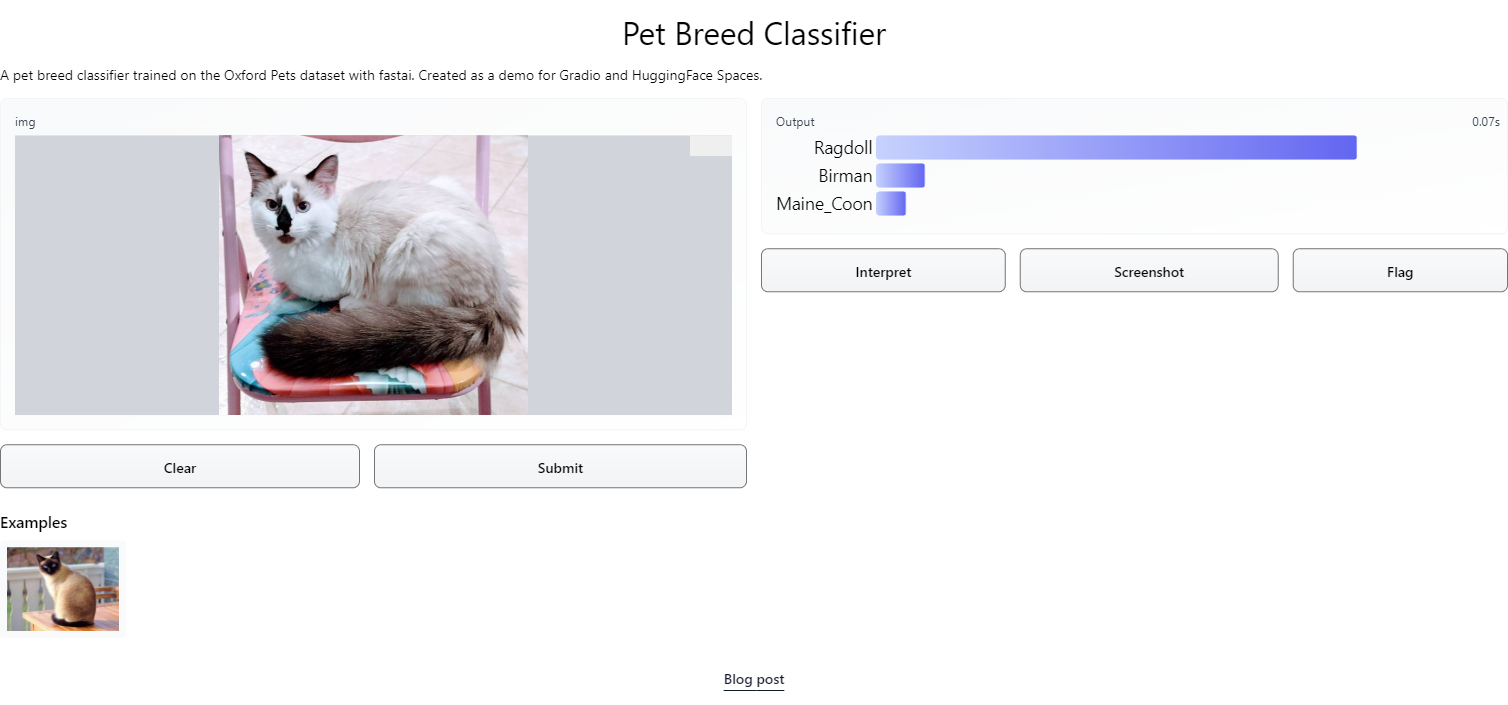